Mudança Ramo teste



Tempo com Laço FOR = 0.047102


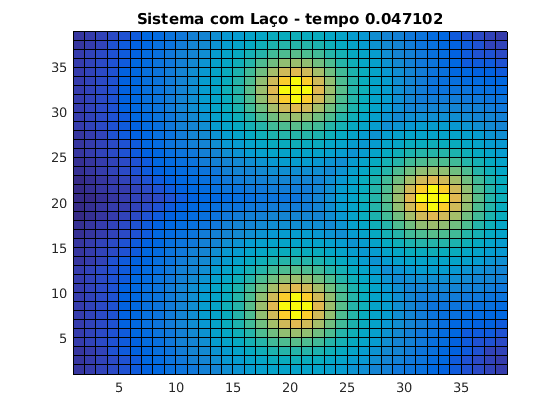

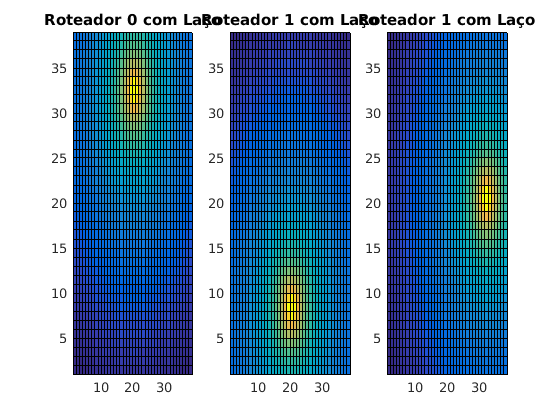

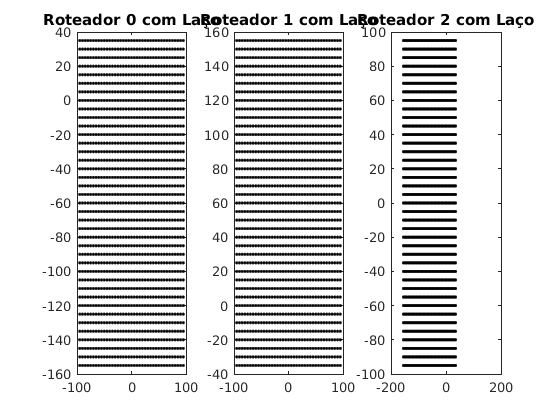

In [2]:
% limpa variáveis, a tela e fecha todos os gráficos existentes
clear all;clc;close all; 
dPasso = 5;                             % Resolução do grid
dDim = 200;                             % Dimensão do grid
nl = (dDim-2*dPasso)/dPasso + 1;        % Número de pontos de medição
%% Código com laço FOR
t1 = tic;                               % Abre um contador de tempo identificado por t1
% Matriz com posição de cada ponto do grid (posição relativa ao canto inferior direito)
for il = 1:nl 
    for ic = 1:nl
        px(il,ic) = dPasso + (ic-1)*dPasso;
        py(ic,il) = px(il,ic);
    end
end
% Matrizes de posição e potência recebida
for il = 1:nl
    for ic = 1:nl
        % Matrizes com posição de cada ponto do grid relativa a cada roteador
        pbs0(il,ic) = px(il,ic) + j*py(il,ic) - ( dDim/2 + 0.8*dDim*j); % Roteador 0
        pbs1(il,ic) = px(il,ic) + j*py(il,ic) - ( dDim/2 + 0.2*dDim*j); % Roteador 1
        pbs2(il,ic) = px(il,ic) + j*py(il,ic) - ( dDim*0.8 + 0.5*dDim*j); % Roteador 2
        % Cálculo da potência recebida em cada ponto do grid, recebida de cada roteador
        pl0(il,ic) = 10*log10(1 /abs(pbs0(il,ic))^4/1e-3); % Roteador 0
        pl1(il,ic) = 10*log10(1/abs(pbs1(il,ic))^4/1e-3); % Roteador 1
        pl2(il,ic) = 10*log10(1/abs(pbs2(il,ic))^4/1e-3); % Roteador 1
        % cálculo da melhor potência em cada ponto do grid
        plf(il,ic) = max([pl0(il,ic), pl1(il,ic),pl2(il,ic)]);
    end
end
tempoComFor = toc(t1); % Fecha contador de tempo e guarda tempo na variável tempoComFor
disp(['Tempo com Laço FOR = ' num2str(tempoComFor)]);   % Mostra tempo de execuçao do código
%% Gráficos para código com laço for
% Plota as posiçoes dos pontos do grid para os dois roteadores
subplot(1,3,1); plot(pbs0,'k.'); title('Roteador 0 com Laço');
subplot(1,3,2); plot(pbs1,'k.'); title('Roteador 1 com Laço');
subplot(1,3,3); plot(pbs2,'k.'); title('Roteador 2 com Laço');
figure;
% Plota a mapa de cores relativo a potência para os dois roteadores separadamente
subplot(1,3,1); pcolor(pl0); title('Roteador 0 com Laço');
subplot(1,3,2); pcolor(pl1); title('Roteador 1 com Laço');
subplot(1,3,3); pcolor(pl2); title('Roteador 1 com Laço');
figure;
% Plota a mapa de cores realtivo a melhor potência em cada ponto do grid (melhor entre os dois roteadores)
pcolor(plf);title(['Sistema com Laço - tempo ' num2str(tempoComFor)]);